#**Install Requirement Library**

In [1]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.4 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3853 sha256=ba15f85fa17ce951850ad757ff2d35aefdead085b851ca86b0bf2cdbc737d3cd
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [2]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [3]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,NaN,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
1,2016-12-31T07:21:08.220Z,-6.0786,130.0318,137.85,4.6,mb,NaN,82.0,2.271,0.86,...,2017-03-23T22:52:10.040Z,"250km NW of Saumlaki, Indonesia",earthquake,8.9,8.2,0.122,20.0,reviewed,us,us
2,2016-12-30T08:24:53.620Z,-9.1767,123.5689,116.02,4.6,mb,NaN,59.0,0.897,0.89,...,2017-03-23T22:52:09.040Z,"51km NNW of Naisano Dua, Indonesia",earthquake,7.7,6.6,0.110,25.0,reviewed,us,us
3,2016-12-30T07:10:05.390Z,1.7358,126.5028,42.15,5.0,mb,NaN,92.0,1.289,0.95,...,2017-03-23T22:52:09.040Z,"142km NW of Kota Ternate, Indonesia",earthquake,7.8,7.4,0.075,57.0,reviewed,us,us
4,2016-12-30T06:41:20.480Z,-9.1597,118.7325,105.58,4.4,mb,NaN,81.0,3.502,0.64,...,2017-03-23T22:52:09.040Z,"45km SSE of Tolotangga, Indonesia",earthquake,6.7,8.6,0.134,16.0,reviewed,us,us


#**Variable Description**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54920 entries, 0 to 54919
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             54920 non-null  object 
 1   latitude         54920 non-null  float64
 2   longitude        54920 non-null  float64
 3   depth            54920 non-null  float64
 4   mag              54920 non-null  float64
 5   magType          54920 non-null  object 
 6   nst              25302 non-null  float64
 7   gap              28774 non-null  float64
 8   dmin             7137 non-null   float64
 9   rms              50921 non-null  float64
 10  net              54920 non-null  object 
 11  id               54920 non-null  object 
 12  updated          54920 non-null  object 
 13  place            54920 non-null  object 
 14  type             54920 non-null  object 
 15  horizontalError  4984 non-null   float64
 16  depthError       25455 non-null  float64
 17  magError    

#**Magnitude Type**

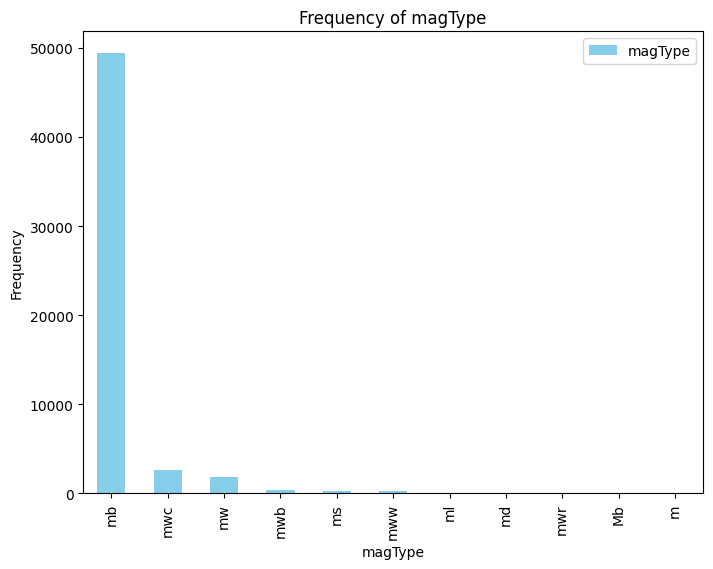

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
data = pd.read_csv(url)

# Menghitung frekuensi setiap jenis 'magType'
magtype_counts = data['magType'].value_counts()

# Buat plot bar
plt.figure(figsize=(8, 6))
magtype_counts.plot(kind='bar', color='skyblue')

# Beri label sumbu x dan y serta judul grafik
plt.xlabel('magType')
plt.ylabel('Frequency')
plt.title('Frequency of magType')

# Tampilkan legenda
plt.legend(['magType'])

# Tampilkan grafik
plt.show()


#**Correlation Variable**

The correlation matrix showcases the relationships between the numeric variables within the dataset. For instance:

Positive Correlation: If two variables have a value close to +1, it implies a strong positive relationship. For instance, if variables A and B have a correlation coefficient of 0.8, it suggests that as variable A increases, variable B also tends to increase.

Negative Correlation: If two variables have a value close to -1, it signifies a strong negative relationship. For example, if variables C and D have a correlation coefficient of -0.6, it suggests that as variable C increases, variable D tends to decrease.

No Correlation: A correlation coefficient close to 0 indicates no linear relationship between the variables. If variables E and F have a correlation coefficient of 0.1, there's little to no linear relationship between them.

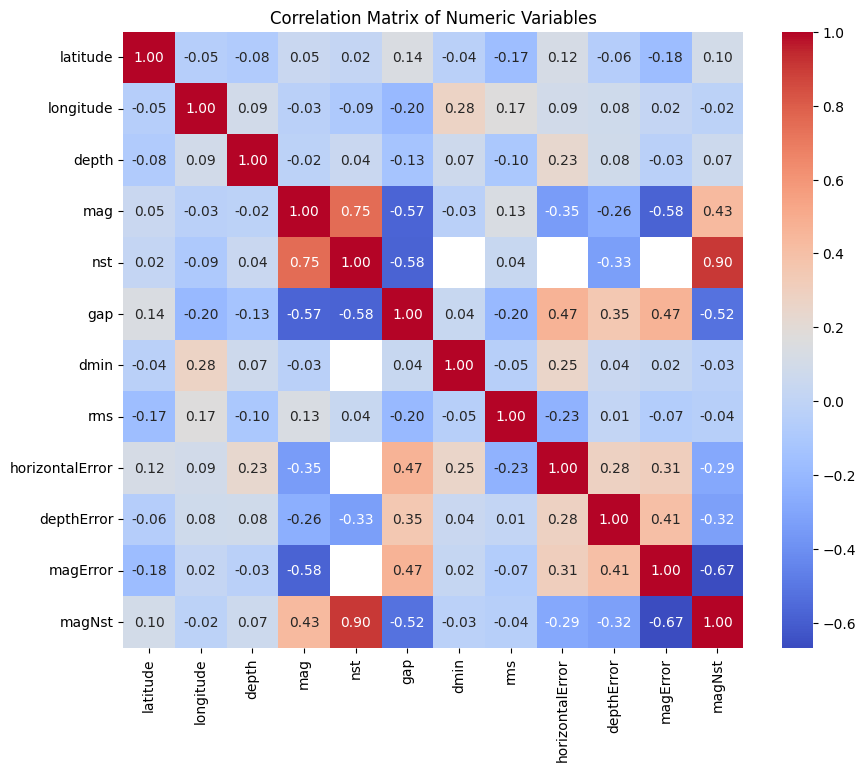

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
data = pd.read_csv(url)

# Pilih kolom numerik untuk membuat matriks korelasi
numeric_data = data.select_dtypes(include='number')

# Hitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Buat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


#**Statistical Description of Earthquake Events**

In [7]:
# Total earthquake events
N_tot = df['mag'].count()
print('Total earthquake events **1910 until 2016**', N_tot)
print('Average number of events per week:', round(N_tot/(52*(2016-1910+1)),2) )
print('Average number of events per year:', round(N_tot/((2016-1910+1)),2) )

# List of largest earthquake events
print('The magnitude of the largest earthquake:')
df[['mag','time','place']].sort_values('mag',ascending=False).head(5)

Total earthquake events **1910 until 2016** 54920
Average number of events per week: 9.87
Average number of events per year: 513.27
The magnitude of the largest earthquake:


,mag,time,place
25691,9.1,2004-12-26T00:58:53.450Z,off the west coast of northern Sumatra
25196,8.6,2005-03-28T16:09:36.530Z,"northern Sumatra, Indonesia"
54800,8.5,1938-02-01T19:04:22.000Z,Banda Sea
17546,8.4,2007-09-12T11:10:26.830Z,"southern Sumatra, Indonesia"
54911,8.3,1918-08-15T12:18:21.000Z,"Mindanao, Philippines"


In [8]:
#Object Date Time
df['dt_time'] = df['time'].apply(lambda x:
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Calculate the number of earthquake events per time (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Calculate the number of earthquake events per time (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

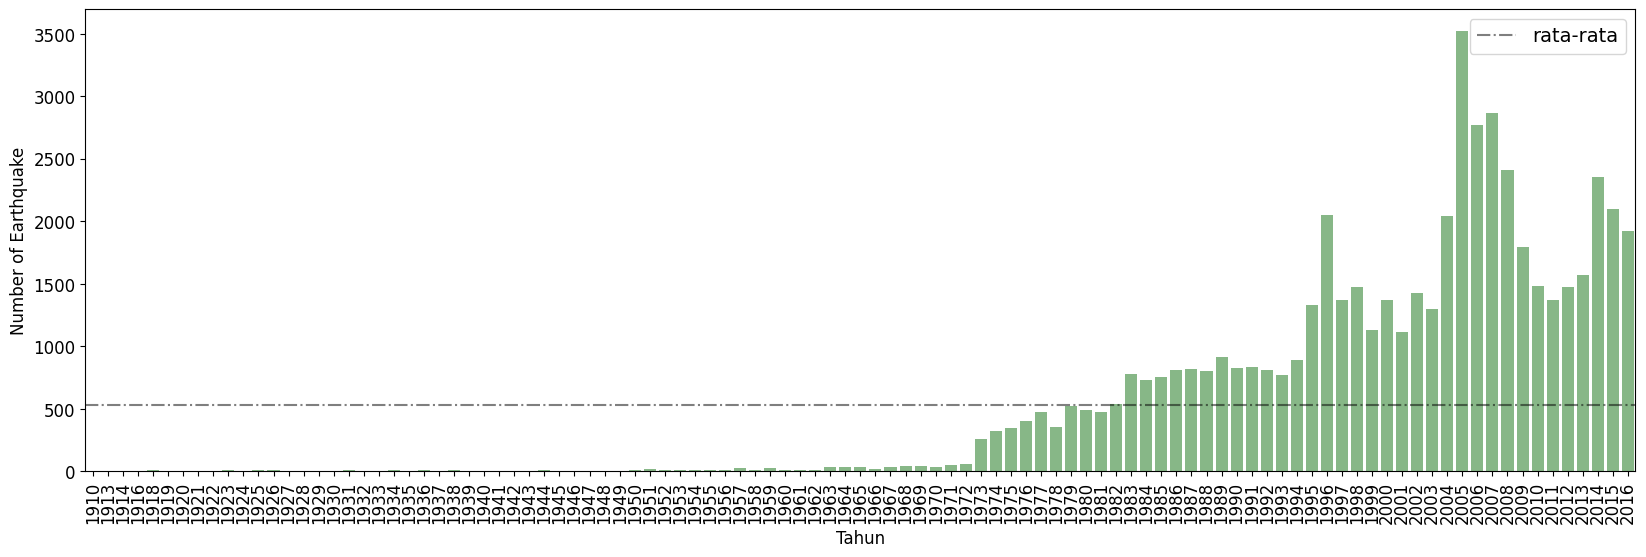

In [9]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(20,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


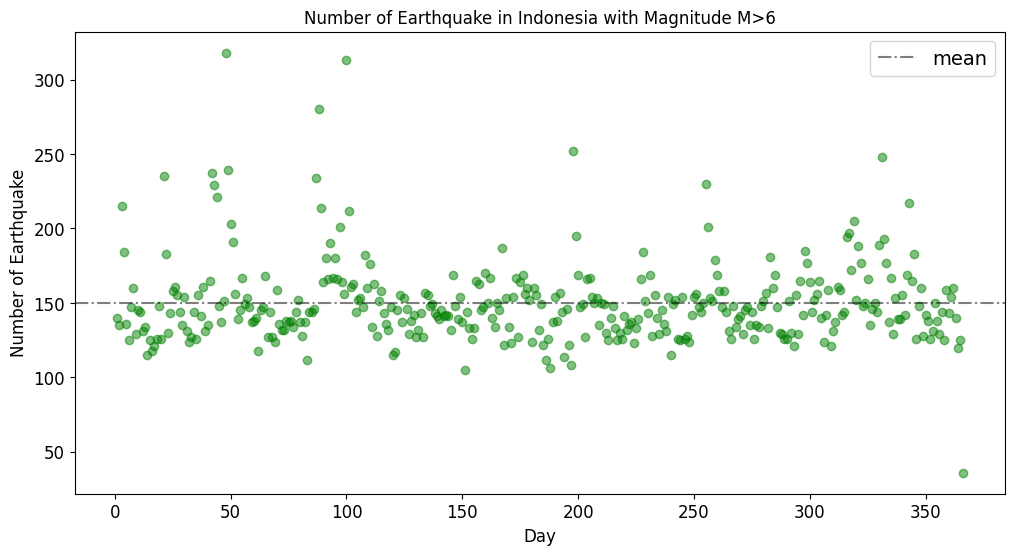

In [10]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Day')
plt.title('Number of Earthquake in Indonesia with Magnitude M>6')
plt.legend()
plt.show()

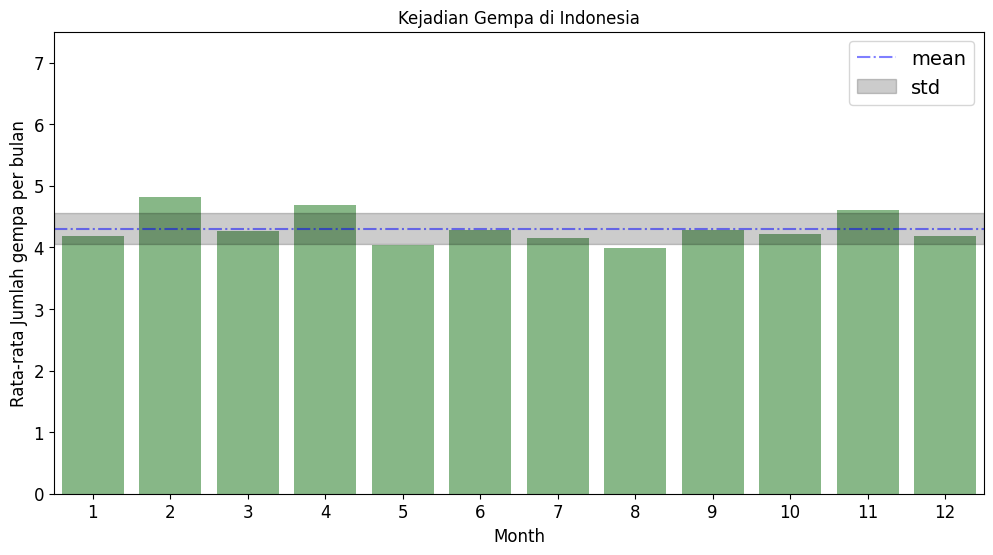

In [11]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 7.5])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Rata-rata Jumlah gempa per bulan'), plt.xlabel('Month')
plt.title('Kejadian Gempa di Indonesia')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

In [12]:
import folium
import pandas as pd

# URL menuju file CSV di GitHub (gunakan tautan "Raw")
#github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/database_original.csv"
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"
#df = pd.read_csv(dataset)

# Baca dataset ke dalam DataFrame
df = pd.read_csv(github_url, sep=',')

# Buat peta dengan lokasi tengah Indonesia sebagai pusat
m = folium.Map(location=[-2.4833826, 117.8902853], zoom_start=5)

# Tentukan rentang magnitudo dan warna yang sesuai
magnitude_ranges = [(5, 6, 'blue', 'Magnitude 5-6'),
                   (6.1, 7, 'green', 'Magnitude 6.1-7'),
                   (7.1, 8, 'orange', 'Magnitude 7.1-8'),
                   (8.1, 9, 'red', 'Magnitude 8.1-9')]

# Tambahkan marker untuk setiap gempa bumi pada peta dengan legend
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    for index, row in mag_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m)

# Tambahkan legend ke peta
legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 120px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px;">
     <p><b>Legenda</b></p>
     <p><i class="fa fa-circle" style="color:blue"></i>Magnitude: 5-6</p>
     <p><i class="fa fa-circle" style="color:green"></i>Magnitude: 6.1-7</p>
     <p><i class="fa fa-circle" style="color:orange"></i>Magnitude: 7.1-8</p>
     <p><i class="fa fa-circle" style="color:red"></i>Magnitude: 8.1-9</p>
      </div>
     """

m.get_root().html.add_child(folium.Element(legend_html))

# Menyimpan peta ke file HTML
m.save("earthquake_map.html")

# Tampilkan peta di dalam notebook
m


Output hidden; open in https://colab.research.google.com to view.

<ipython-input-25-9911b8b1ccce>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-25-9911b8b1ccce>:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


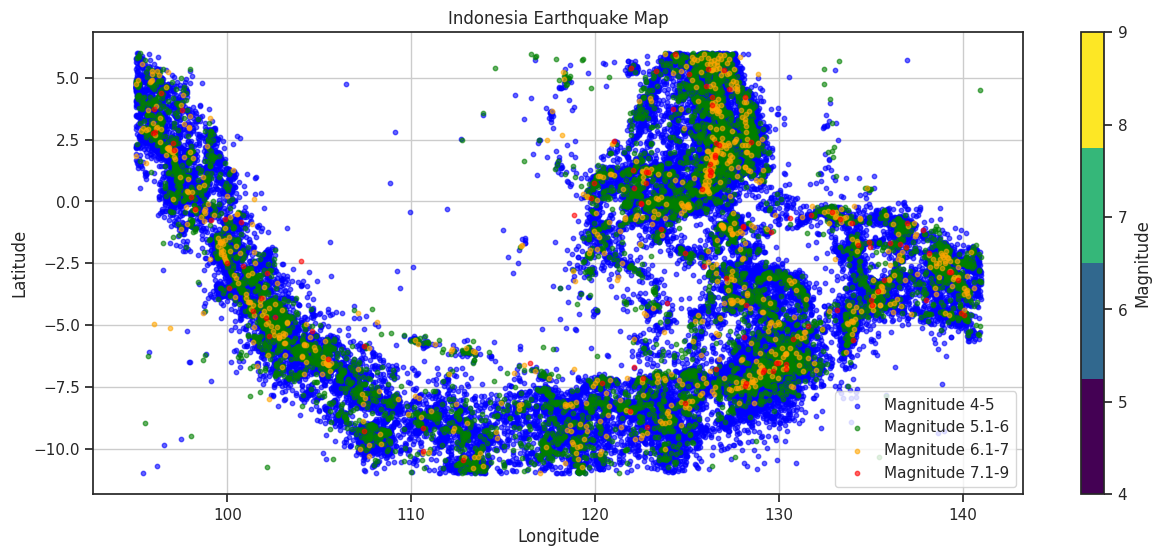

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub URL dataset gempa bumi di California
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"

# Membaca dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(15, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    plt.scatter(mag_data['longitude'], mag_data['latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Lable and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Indonesia Earthquake Map')

# Display Map
plt.grid(True)
plt.show()


#**Frequency**

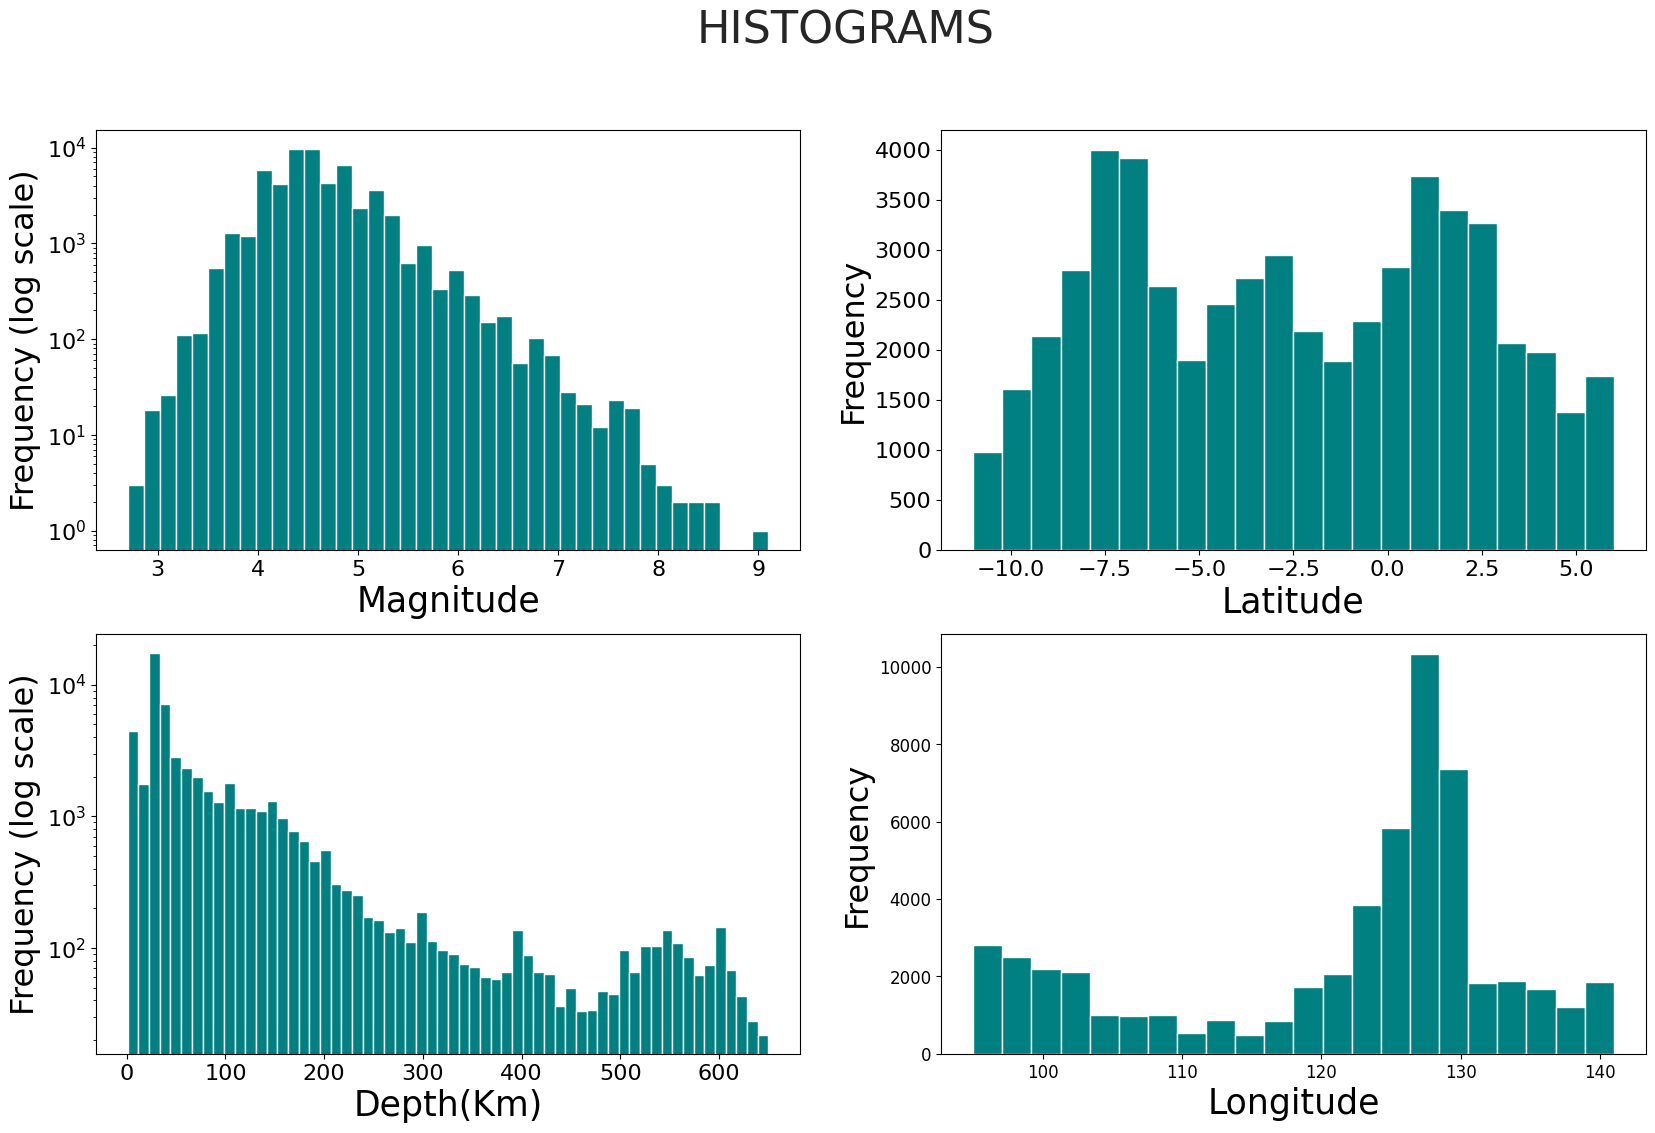

In [13]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


##**Depth, Longitude**

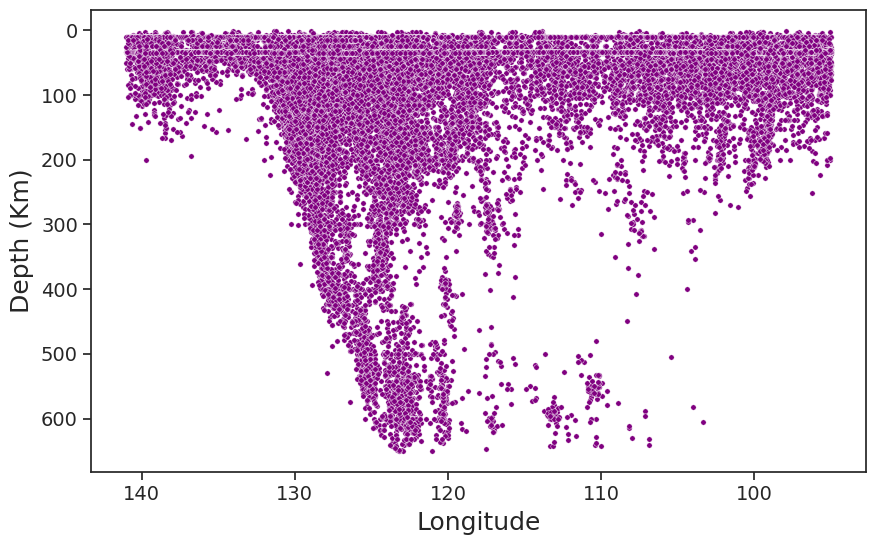

In [15]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

## **Depth, Latitude**

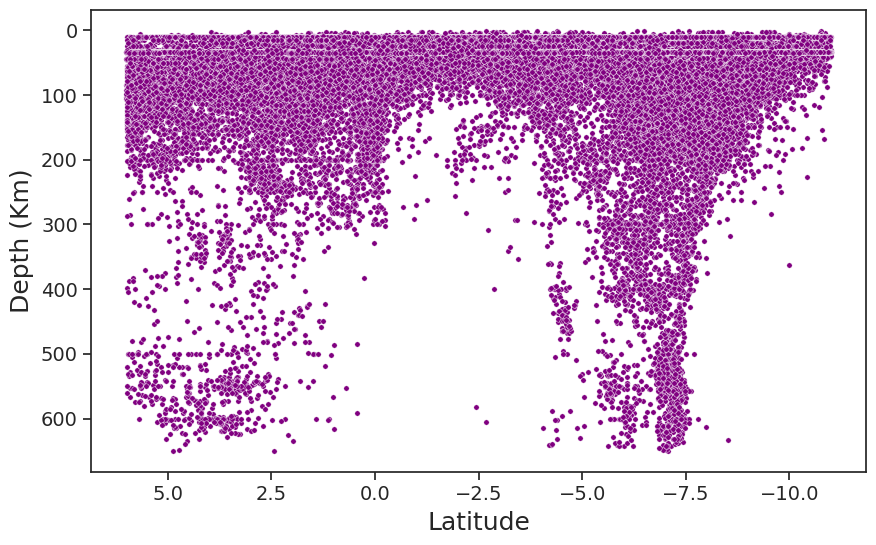

In [16]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Break Location into Grid 1x1 (degree)**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub URL
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/QueryCountryIndonesia(1910-2016)USGS.csv"

# Read dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Print the latitude and longitude range
print("Range Latitude:", min_lat, "until", max_lat)
print("Range Longitude:", min_lon, "until", max_lon)


Range Latitude: -11.0 until 6.0
Range Longitude: 95.0 until 140.999


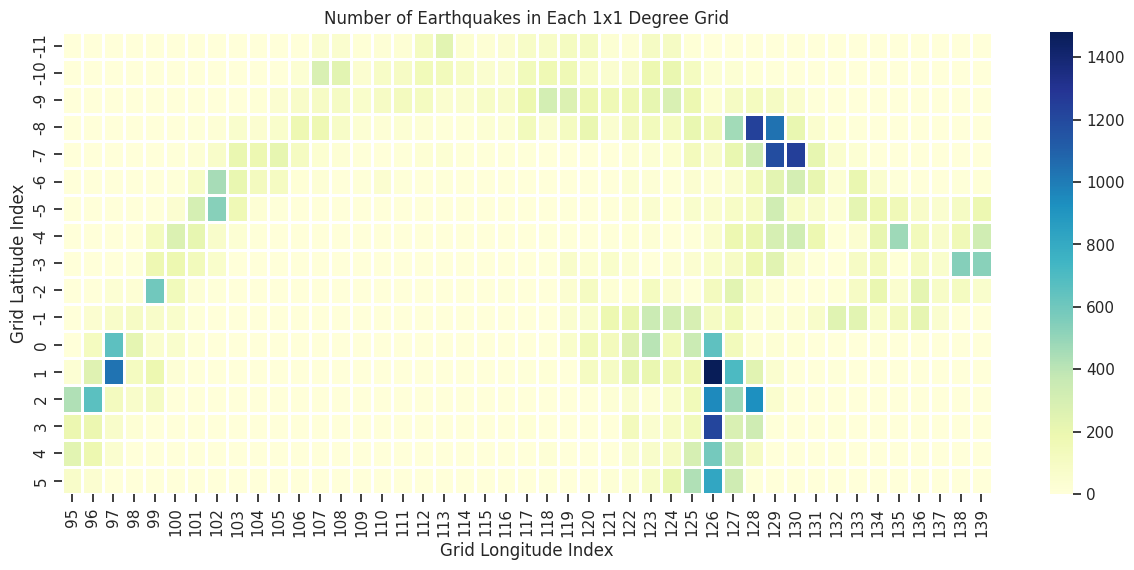

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns


# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# save a result in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Display result
plt.figure(figsize=(15, 6))
sns.heatmap(grid_df, cmap='YlGnBu', linecolor='white', linewidth=1)
plt.xlabel('Grid Longitude Index')
plt.ylabel('Grid Latitude Index')
plt.title('Number of Earthquakes in Each 1x1 Degree Grid')
plt.show()


In [37]:
import pandas as pd
import numpy as np

# Calculate Sum of Earthquake in grid 1x1 degree
lat_bins = np.arange(int(min_lat), int(max_lat) + 1, 1)
lon_bins = np.arange(int(min_lon), int(max_lon) + 1, 1)

grid_counts = np.zeros((len(lat_bins) - 1, len(lon_bins) - 1), dtype=int)

for i in range(len(lat_bins) - 1):
    for j in range(len(lon_bins) - 1):
        # Filter data within the current grid
        grid_data = df[
            (df['latitude'] >= lat_bins[i]) & (df['latitude'] < lat_bins[i + 1]) &
            (df['longitude'] >= lon_bins[j]) & (df['longitude'] < lon_bins[j + 1])
        ]
        # Count earthquakes in the grid
        grid_counts[i][j] = len(grid_data)

# Save in DataFrame
grid_df = pd.DataFrame(grid_counts, index=range(int(min_lat), int(max_lat)), columns=range(int(min_lon), int(max_lon)))

# Splitting the grid_df DataFrame into three sections of size 17x15
part1 = grid_df.iloc[:17, :14]
part2 = grid_df.iloc[:17, 14:28]
part3 = grid_df.iloc[:17, 28:39]
part4 = grid_df.iloc[:17, 39:45]

# Displaying each part separately
print("Part 1:")
print(part1)
print("\nPart 2:")
print(part2)
print("\nPart 3:")
print(part3)
print("\nPart 4:")
print(part4)


Part 1:
     95   96    97   98   99   100  101  102  103  104  105  106  107  108
-11    1    1     0    0    0    0    0    1    0    0    3    1   47   56
-10    0    1     1    1    0    0    0    0    0    0    4   29  289  240
-9     1    0     0    0    0    0    0    1    3   13   46   78   94  103
-8     0    0     0    0    1    0    6   21   61   45   66  176  177   86
-7     2    0     2    3    0   11   21   80  201  184  214  108   40   26
-6     0    1     1    0    0    9   90  454  208  127  105   16   18    3
-5     1    0     0    5    4   42  306  534  164   25    8    4    4    2
-4     0    0     0    4  118  276  216   71   30    8    1    0    0    0
-3     0    2     2    7  174  188  136   64    5    1    0    0    0    0
-2     0    4    34   25  601  142   21    9    1    0    1    0    0    0
-1     0   43    79   97   79   66   10    1    0    0    0    0    0    0
0      3  120   659  226   57   58    6    0    0    0    0    0    0    1
1     29  260  10